In [109]:
# importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr, ttest_rel,ttest_ind, f_oneway, chi2_contingency
import seaborn as sns
import os 
os.chdir("C:\\Users\\ashut\\Desktop\\AnalytixLab Classes\\python teram 2\\Basic Statistics - Hypothesis Testing\\4. Basic Statistics - Hypothesis Testing")
%matplotlib inline

### BUSINESS PROBLEM 1:
### Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)
#### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)
#### b. Loan length is directly effecting intrest rate.
#### c. Inrest rate varies for different purpose of loans
#### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.


In [111]:
df = pd.read_csv('LoansData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [112]:
# Data cleaning
df['Amount.Requested'] = pd.to_numeric(df['Amount.Requested'], errors='coerce')
df['Amount.Funded.By.Investors'] = pd.to_numeric(df['Amount.Funded.By.Investors'], errors='coerce')
df['Interest.Rate'] = df['Interest.Rate'].astype(str).str.replace('%', '').astype(float)
df['Loan.Length'] = df['Loan.Length'].astype(str).str.replace(' months', '').astype(int)
df['Debt.To.Income.Ratio'] = df['Debt.To.Income.Ratio'].astype(str).str.replace('%', '').astype(float)
df['Monthly.Income'] = pd.to_numeric(df['Monthly.Income'], errors='coerce')
df['Open.CREDIT.Lines'] = pd.to_numeric(df['Open.CREDIT.Lines'], errors='coerce')
df['Revolving.CREDIT.Balance'] = pd.to_numeric(df['Revolving.CREDIT.Balance'], errors='coerce')
df['Inquiries.in.the.Last.6.Months'] = pd.to_numeric(df['Inquiries.in.the.Last.6.Months'], errors='coerce')
df.dropna(inplace=True)

In [113]:
df.isna().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

### 1: Interest rate is varied for different loan amounts

#### H0: There is no relationship between loan amounts and interest rates.
#### Ha: There is a relationship between loan amounts and interest rates.

#### we will use Pearson correlation test

Reason for Choosing the Test:
The Pearson correlation test measures the strength and direction of the linear relationship between two continuous variables. In this case, both Amount.Requested (loan amounts) and Interest.Rate are continuous variables, so the Pearson correlation is appropriate to test for any linear relationship between them.

In [117]:
# Test for correlation between loan amount and interest rate
correlation, p_value = stats.pearsonr(df['Amount.Requested'], df['Interest.Rate'])

print(f"Correlation: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship between loan amounts and interest rates.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between loan amounts and interest rates.")

Correlation: 0.3265583478468463, P-value: 4.545508509292087e-61
Reject the null hypothesis: There is a relationship between loan amounts and interest rates.


### 2: Loan length is directly affecting interest rate
#### H0: Loan length does not affect interest rate.
#### Ha: Loan length affects interest rate.

#### Test Used: T-test for independent samples

Reason for Choosing the Test:
A T-test for independent samples is used to compare the means of two independent groups to determine if they are significantly different from each other. In this case, Loan.Length has two categories (36 months and 60 months), and we want to compare the average interest rates for these two categories. The T-test is suitable for comparing the means of these two groups.

In [119]:
# Separate the data into two groups based on loan length
loan_length_36 = df[df['Loan.Length'] == 36]['Interest.Rate']
loan_length_60 = df[df['Loan.Length'] == 60]['Interest.Rate']

t_stat, p_value = stats.ttest_ind(loan_length_36, loan_length_60)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Loan length affects interest rate.")
else:
    print("Fail to reject the null hypothesis: Loan length does not affect interest rate.")


T-statistic: -23.05779328482699, P-value: 1.79380106734165e-106
Reject the null hypothesis: Loan length affects interest rate.


### 3: Interest rate varies for different purposes of loans
#### H0: Interest rate does not vary for different purposes of loans.
#### Ha: Interest rate varies for different purposes of loans.

#### Test Used: ANOVA (Analysis of Variance)

Reason for Choosing the Test:
ANOVA is used to compare the means of three or more independent groups to see if there is a significant difference among them. In this case, Loan.Purpose is a categorical variable with multiple categories (e.g., debt consolidation, home improvement, etc.), and we want to compare the average interest rates across these different purposes. ANOVA is suitable for this purpose.

In [121]:
grouped_data = [group['Interest.Rate'].values for name, group in df.groupby('Loan.Purpose')]
f_stat, p_value = stats.f_oneway(*grouped_data)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Interest rate varies for different purposes of loans.")
else:
    print("Fail to reject the null hypothesis: Interest rate does not vary for different purposes of loans.")


F-statistic: 7.330838185919651, P-value: 2.7646672581411367e-14
Reject the null hypothesis: Interest rate varies for different purposes of loans.


### 4: There is a relationship between FICO scores and home ownership
#### H0: There is no relationship between FICO scores and home ownership.
#### Ha: There is a relationship between FICO scores and home ownership.

#### Test Used: Chi-square test for independence

Reason for Choosing the Test:
The Chi-square test for independence is used to determine if there is a significant association between two categorical variables. In this case, FICO.Range and Home.Ownership are both categorical variables. The Chi-square test will help us determine if the distribution of FICO ranges is independent of home ownership status.

In [123]:
# Create a contingency table for FICO range and Home ownership
contingency_table = pd.crosstab(df['FICO.Range'], df['Home.Ownership'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship between FICO scores and home ownership.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between FICO scores and home ownership.")


Chi-square statistic: 269.7881202757335, P-value: 3.087547281383599e-15
Reject the null hypothesis: There is a relationship between FICO scores and home ownership.


### BUSINESS PROBLEM - 2
#### BACKGROUND: When an order is placed by a customer of a small manufacturing company, a price quote must be developed for that order. Because each order is unique, quotes must be established on an order-by-order basis by a pricing expert. The price quote process is laborintensive, as prices depend on many factors such as the part number, customer, geographic location, market, and order volume. The sales department manager is concerned that the pricing process is too complex, and that there might be too much variability in the quoted prices. An improvement team is tasked with studying and improving the pricing process.

After interviewing experts to develop a better understanding of the current process, the team designed a study to determine if there is variability between pricing experts. That is, do different pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and Barry, were asked to independently provide prices for twelve randomly selected orders. Each expert provided one price for each of the twelve orders.



#### BUSINESS PROBLEM:
We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

##### DATA AVAILABLE:
Price_Quotes.csv
The data set contains the order number, 1 through 12, and the price quotes by Mary and Barry for each order. Each row in the data set is the same order. Thus, Mary and Barry produced quotes for the same orders.

In [126]:
# Load the data
df = pd.read_csv('Price_Quotes.csv')

# Inspect the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [127]:
# Ensure price quotes are numeric
df['Mary'] = pd.to_numeric(df['Mary_Price'], errors='coerce')
df['Barry'] = pd.to_numeric(df['Barry_Price'], errors='coerce')

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)
df.drop(['Barry_Price','Mary_Price'],axis=1)


Order_Number    0
Barry_Price     0
Mary_Price      0
Mary            0
Barry           0
dtype: int64


,Order_Number,Mary,Barry
0,1,114,126
1,2,118,110
2,3,114,138
3,4,111,142
4,5,129,146
5,6,119,136
6,7,97,94
7,8,104,103
8,9,127,140
9,10,133,152


##### H0 :There is a significant difference in the average price quotes provided by Mary and Barry.
##### Ha :There is no significant difference in the average price quotes provided by Mary and Barry. 

Based on the t-test results, we compare the p-value to the significance level (α = 0.05) to determine whether to reject the null hypothesis.

If 𝑝_val < 0.05 : There is a significant difference in the average price quotes provided by Mary and Barry. This indicates variability between the two pricing experts, suggesting that the pricing process may benefit from standardization or further training to reduce this variability.

If 𝑝_val ≥ 0.05: There is no significant difference in the average price quotes provided by Mary and Barry. This suggests that the pricing process is consistent between the two experts.

In [130]:
# Perform paired sample t-test
t_stat, p_val = ttest_rel(df['Mary'], df['Barry'])

# Print the results
print(f"t-statistic: {t_stat}, p-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the average price quotes provided by Mary and Barry.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average price quotes provided by Mary and Barry.")

t-statistic: -2.5213765108923494, p-value: 0.02840588045242053
Reject the null hypothesis. There is a significant difference in the average price quotes provided by Mary and Barry.


Based on the results of the paired sample t-test, we can conclude whether there is significant variability between the price quotes provided by Mary and Barry.

### BUSINESS PROBLEM-3:
#### BACKGROUND: The New Life Residential Treatment Facility is a NGO that treats teenagers who have shown signs of mental illness. It provides housing and supervision of teenagers who are making the transition from psychiatric hospitals back into the community. Because many of the teenagers were severely abused as children and have been involved with the juvenile justice system, behavioral problems are common at New Life. Employee pay is low and staff turnover (attrition) is high.
A reengineering program was instituted at New Life with the goals of lowering behavioral problems of the kids and decreasing employee turnover rates. As a part of this effort, the following changes were made:

 Employee shifts were shortened from 10 hours to 8 hours each day.

 Employees were motivated to become more involved in patient treatments. This included encouraging staff to run various therapeutic treatment sessions and allowing staff to have more say in program changes.

 The activities budget was increased.

 A facility-wide performance evaluation system was put into place that rewarded staff participation and innovation.

 Management and staff instituted a program designed to raise expectations about appropriate behavior from the kids. This included strict compliance with reporting of behavioral violations, insistence on participation in therapeutic sessions, and a lowered tolerance for even moderate behavioral infyTo determine the effectiveness of the reengineering effort, a data set comprised of pre- and post-reengineering periods was compiled. The information contains two measures of behavioral problems. A critical incident occurs when a resident goes AWOL (leaves the premises without permission), destroys property (e.g., punching a hole in a wall or throwing furniture through windows), is caught in possession of street drugs, or engages in assault against other residents or staff members. A teenager is temporarily removed from the facility when s/he is sent to jail or back to a psychiatrirate
improved?


#### BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

DATA AVAILABLE: Treatment_Facility.csv
The data set contains 20 months of data; the first 13 months were prior to reengineering. The variables in the data include:

Reengineer: Whether the month was before (Prior) or after (Post) reengineering

Employee Turnover: The percentage of employees who quit in a given month, out of the total number of employees

TRFF(%): The percentage of residents who were temporarily removed from the facility, out of the total number of residents

CI (%): The percentage of critical incident reports written that month, out of the total number of residents

### Hypotheses
#### To determine the effectiveness of the reengineering effort, we will test the following hypotheses:

#### Effect on Critical Incident Rate (CI)

##### H0: There is no significant difference in the critical incident rate before and after reengineering.
##### Ha: There is a significant difference in the critical incident rate before and after reengineering.

#### Effect on Employee Turnover

###### H0: There is no significant difference in employee turnover rates before and after reengineering.
###### Ha: There is a significant difference in employee turnover rates before and after reengineering.

In [136]:

# Load the data
df = pd.read_csv('Treatment_Facility.csv')

# Inspect the data
print(df.head())
print(df.tail())
print(df.info())


   Month Reengineer  Employee_Turnover       VAR4        VAR5
0      1      Prior             0.0000  24.390244   42.682927
1      2      Prior             6.0606  19.354839   25.806452
2      3      Prior            12.1212  35.087719  146.198830
3      4      Prior             3.3333  18.404908  110.429448
4      5      Prior            12.9032  17.964072   23.952096
    Month Reengineer  Employee_Turnover       VAR4       VAR5
15     16       Post            12.8205  13.043478  34.782609
16     17       Post            15.7895   9.950249  19.900498
17     18       Post             0.0000   9.950249   9.950249
18     19       Post            30.7692   8.510638  25.531915
19     20       Post            26.8293   9.259259  23.148148
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reeng

In [137]:
df.Reengineer.value_counts()

Reengineer
Prior    13
Post      7
Name: count, dtype: int64

In [138]:
# Separate the data into before and after reengineering
prior_ci = df[df['Reengineer'] == 'Prior']['VAR5']
post_ci = df[df['Reengineer'] == 'Post']['VAR5']
prior_turnover = df[df['Reengineer'] == 'Prior']['Employee_Turnover']
post_turnover = df[df['Reengineer'] == 'Post']['Employee_Turnover']

print(f"prior_ci:\n {prior_ci.mean()} \npost_ci:\n {post_ci.mean()} ")
print(f"prior_turnover:\n {prior_turnover.mean()} \npost_turnover:\n {post_turnover.mean()} ")

prior_ci:
 53.887906321846145 
post_ci:
 23.34971927988571 
prior_turnover:
 11.735692307692307 
post_turnover:
 18.68912857142857 


In [139]:
# Perform the t-tests
t_stat_ci, p_val_ci = ttest_ind(prior_ci, post_ci)
t_stat_turnover, p_val_turnover = ttest_ind(prior_turnover, post_turnover)

# Print the results
print(f"Critical Incident Rate (CI) - t-statistic: {t_stat_ci}, p-value: {p_val_ci}")
print(f"Employee Turnover - t-statistic: {t_stat_turnover}, p-value: {p_val_turnover}")

Critical Incident Rate (CI) - t-statistic: 1.627914425352865, p-value: 0.12091989189884148
Employee Turnover - t-statistic: -1.770306704753604, p-value: 0.09361109345535304


I have taken the significange rate  = 90% and alfa = 0.10

In [141]:
# Interpretation
if p_val_ci < 0.1:
    print("Reject the null hypothesis for CI. There is a significant difference in the critical incident rate before and after reengineering.")
else:
    print("Fail to reject the null hypothesis for CI. There is no significant difference in the critical incident rate before and after reengineering.")



Fail to reject the null hypothesis for CI. There is no significant difference in the critical incident rate before and after reengineering.


In [142]:
if p_val_turnover < 0.1:
    print("Reject the null hypothesis for Employee Turnover. There is a significant difference in employee turnover rates before and after reengineering.")
else:
    print("Fail to reject the null hypothesis for Employee Turnover. There is no significant difference in employee turnover rates before and after reengineering.")

Reject the null hypothesis for Employee Turnover. There is a significant difference in employee turnover rates before and after reengineering.


#### BUSINESS PROBLEM-4
##### BACKGROUND: Software development projects typically follow six basic phases: Requirements, design, implementation (and integration), testing (validation), deployment (installation) and maintenance. First, general requirements are gathered, and the scope of the functionality is defined. Then, alternative scenarios for the required functionality are developed and evaluated. Implementation, usually 50% or more of the development time, is the phase in which the design is translated into programs and integrated with other parts of the software – this is when software engineers actually develop the code. During the final phases, programs are tested, software is put into use, and faults or performance issues are addressed.

ApDudes, a developer of applications for tablet computers, was having difficulty meeting project deadlines; only 10% of their projects had been completed within budget and on time last year and that was starting to hurt business. The group’s project manager was tasked with studying problems within the implementation phase. He found that software engineers were having difficulty prioritizing their work, and that they often became overwhelmed by the magnitude of the projects.

As a result, two changes were made. Each project was broken down into smaller, distinct tasks, or jobs, and each job was assigned a priority. The project manager believes that this classification and prioritization system would speed the completion of high priority jobs, and thus lower overall project completion time

#### BUSINESS PROBLEM:
We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

DATA AVAILABLE:

Priority_Assessment.csv The data set contains a random sample of 642 jobs completed over the last six months. The variables in the data set are:
Days The number of days it took to complete the job
Priority The priority level assigned to that job

##### we will perform hypothesis testing to determine if there is a significant difference in the completion times for high, medium, and low-priority jobs.
##### Specifically, we'll use ANOVA (Analysis of Variance) to compare the means of the three groups.

#### H0: There is no significant difference in the mean completion times for high, medium, and low priority jobs. 
#### Ha: There is a significant difference in the mean completion times for high, medium, and low priority jobs.

#### We will use a significance level (𝛼) of 0.05.

In [148]:
# Load the data
df = pd.read_csv('Priority_Assessment.csv')

# Inspect the data
print(df.head())
print(df.info())

# Ensure 'Days' is numeric and 'Priority' is a categorical variable
df['Days'] = pd.to_numeric(df['Days'], errors='coerce')
df['Priority'] = df['Priority'].astype('category')

# Drop rows with missing values
df.dropna(inplace=True)



   Days Priority
0   3.3     High
1   7.9   Medium
2   0.3     High
3   0.7   Medium
4   8.6   Medium
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB
None


In [149]:
# Group the data by priority
high_priority = df[df['Priority'] == 'High']['Days']
medium_priority = df[df['Priority'] == 'Medium']['Days']
low_priority = df[df['Priority'] == 'Low']['Days']

print(f"\n High priority:{high_priority.mean()},\n Medium priority:{medium_priority.mean()},\n Low priority:{low_priority.mean()}")


 High priority:3.0236196319018402,
 Medium priority:2.5,
 Low priority:4.228358208955224


In [150]:
# Perform one-way ANOVA
f_stat, p_val = f_oneway(high_priority, medium_priority, low_priority)

# Print the results
print(f"ANOVA results - F-statistic: {f_stat}, p-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis.There is  significant difference in the mean completion times for high, medium, and low priority jobs")
else:
    print("Fail to reject the null hypothesis.There is no significant difference in the mean completion times for high, medium, and low priority jobs.")

ANOVA results - F-statistic: 1.812311010076072, p-value: 0.16411459461716182
Fail to reject the null hypothesis.There is no significant difference in the mean completion times for high, medium, and low priority jobs.


#### BUSINESS PROBLEM-5
BackGround: Film on the Rocks is a summer movie series held at the world-renowned Red Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison, Colorado fifteen miles west of Denver. The film series features classic films, and pre-show entertainment including bands and comedians. Among the features that have made Red Rocks an internationally-famous concert stage are sweeping views of Denver, outstanding acoustics, and cool, dry Colorado summers.

The series is jointly promoted by the Denver Film Society (DFS) and the City and County of Denver’s Division of Theatres and Arenas (DT&A). It is marketed through various outlets including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate funds that keep ticket prices low.

Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue, there are tradeoffs. Red Rocks is a farther commute for most people than the local movie theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot, getting there can be challenging. And, as an outdoor venue, the viewing experience is dependent on the weather.

Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But, the series promoters would also like to increase attendance at the film series, and are unsure how to do this. Promoters recognize that they need a better understanding of the customer base, and of the current level of satisfaction. Knowing the demographics of those who attend the film series will help attract and expand corporate sponsorship. In addition, knowing which media outlets are most effective will provideinformation about how best to target future marketing campaigns.

To this end, the promoters conducted surveys during a recent Film on the Rocks season. Questionnaires were handed out at the entrance. Volunteers walked through the crowd to remind people about the free soft drink given to those who returned the survey.

#### BUSINESS PROBLEM: 
1. Use the survey results to address the following questions?
2. What is the overall level of customer satisfaction?
3. What factors are linked to satisfaction?
4. What is the demographic profile of Film on the Rocks patrons?
5. In what media outlet(s) should the film series be advertised?

   
DATA AVAILABLE: Data provided by the Denver Film Society

= Films.csv
outh

The data set contains 330 surveys collected during three Film on the Rocks movies: Ferris Bueller’s Day Off, Old School, and Willy Wonka and the Chocolate Factory. The variables are:

Gender The patron’s gender: 1 = male; 2 = female
Marital Status The patron’s marital status: 1 = married; 2 = single
Age The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+
Income The patron’s annual household income: 1 = Less than 50,000;2=
50- 100,000;3=
100,000+
Hear About The patron’s response to this question: “How did you hear about Film on the Rocks?” Respondents could check any of the following that applied: 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth
The survey also contained four Likert-scaled questions about satisfaction; each of the following questions is coded: 1 = Excellent; 2 = Good; 3 = Average/Fair; 4 = Poor; 5 = Very Poor.

Signage “How was the signage directing you to Red Rocks?”
Parking “How was the venue’s parking?”
Clean “How was the cleanliness of the venue?”
Overall “How was your overall customer service experience?”

In [154]:
# Load the data
df = pd.read_csv('Films.csv')

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

   _rowstate_                    Movie  Gender Marital_Status  Sinage  \
0           0  Ferris Buellers Day Off  Female        Married     2.0   
1           0  Ferris Buellers Day Off  Female         Single     1.0   
2           0  Ferris Buellers Day Off    Male        Married     2.0   
3           0  Ferris Buellers Day Off  Female        Married     1.0   
4           0  Ferris Buellers Day Off  Female        Married     1.0   

   Parking  Clean  Overall  Age  Income Hear_About  
0      2.0    2.0      2.0  3.0     1.0          5  
1      1.0    1.0      1.0  2.0     1.0          5  
2      4.0    3.0      2.0  4.0     1.0          5  
3      3.0    2.0      2.0  4.0     1.0          5  
4      1.0    1.0      1.0  3.0     3.0          1  
_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [155]:
# Check for any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Verify the column names
print(df.columns)

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')


In [156]:
# Ensure all variables are in the correct format
df['Gender'] = df['Gender'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Income'] = df['Income'].astype('category')
df['Hear_About'] = df['Hear_About'].astype('category')

# Summary statistics for satisfaction variables
satisfaction_columns = ['Sinage', 'Parking', 'Clean', 'Overall']
print(df[satisfaction_columns].describe())

           Sinage     Parking       Clean     Overall
count  328.000000  328.000000  327.000000  328.000000
mean     1.884146    1.756098    1.681957    1.618902
std      0.830603    0.798484    0.728313    0.689286
min      1.000000    1.000000    1.000000    1.000000
25%      1.000000    1.000000    1.000000    1.000000
50%      2.000000    2.000000    2.000000    2.000000
75%      2.000000    2.000000    2.000000    2.000000
max      5.000000    5.000000    5.000000    5.000000


In [157]:
# Calculate mean satisfaction score for each question
satisfaction_means = df[satisfaction_columns].mean()
print("Mean satisfaction scores:")
print(satisfaction_means)


Mean satisfaction scores:
Sinage     1.884146
Parking    1.756098
Clean      1.681957
Overall    1.618902
dtype: float64


In [158]:
# Calculate overall satisfaction by combining all satisfaction-related questions
df['Total_Satisfaction'] = df[satisfaction_columns].mean(axis=1)
overall_satisfaction_mean = df['Total_Satisfaction'].mean()
print(f"Overall satisfaction mean score: {overall_satisfaction_mean}")



Overall satisfaction mean score: 1.7350557244174267


C:\Users\ashut\AppData\Local\Temp\ipykernel_4756\1171184977.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Overall)
C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


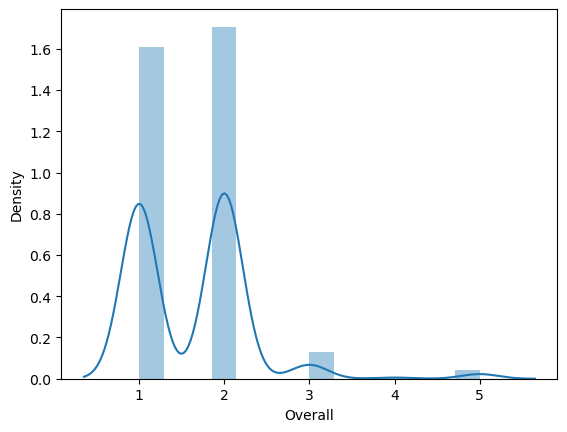

In [159]:
# Distribution of variables
sns.distplot(df.Overall)
plt.show()

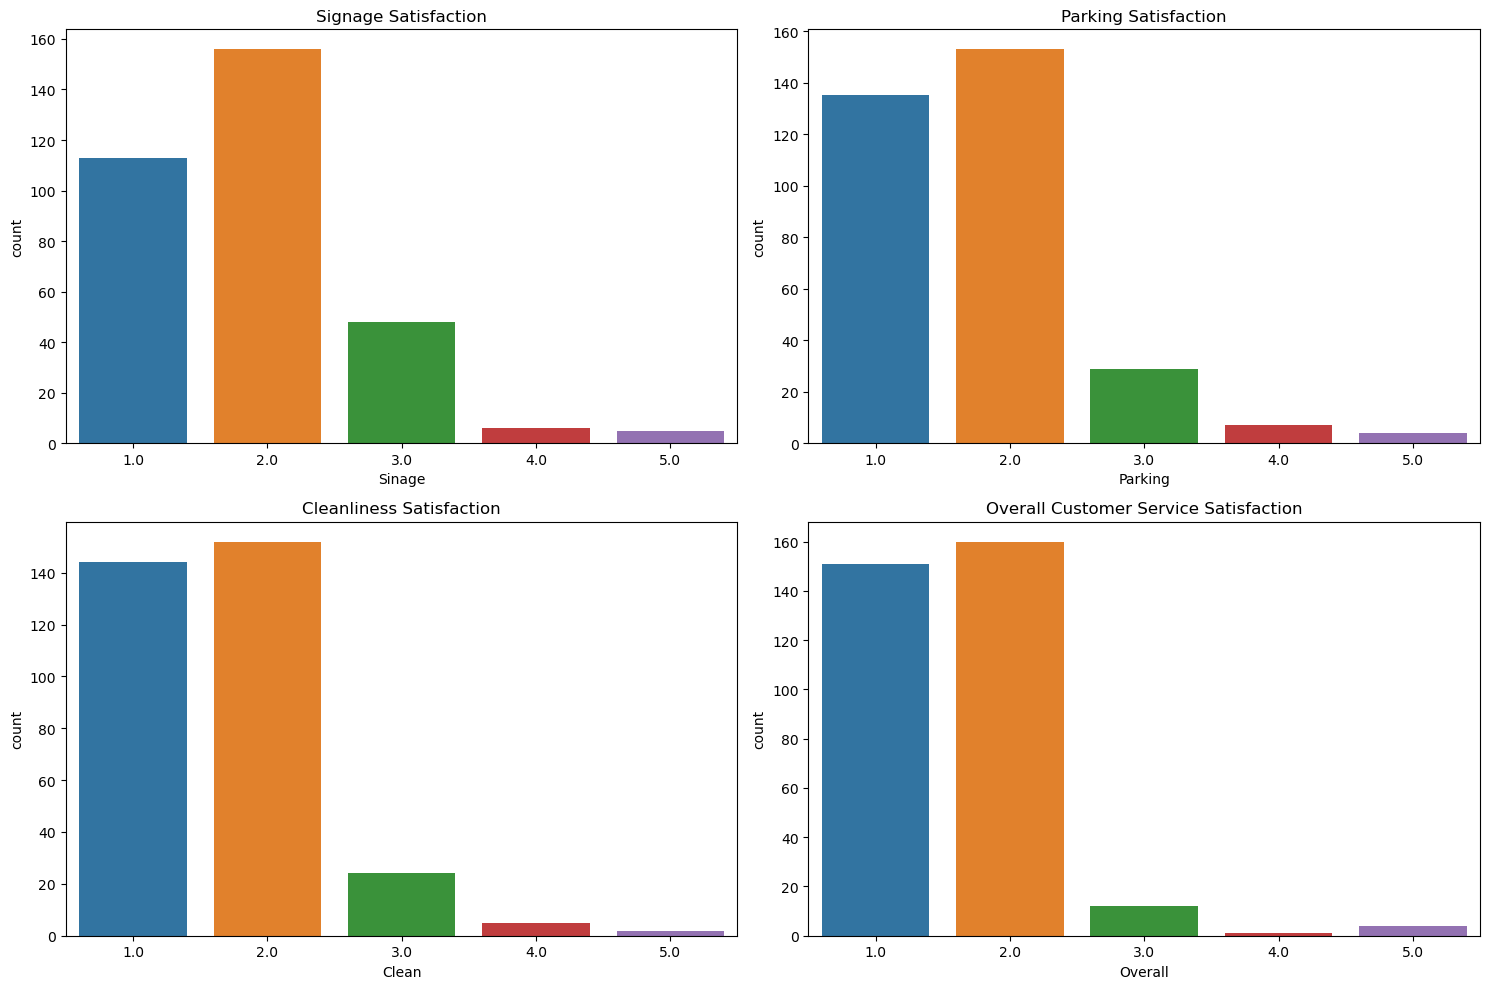

In [160]:
# Visualize the distribution of satisfaction levels
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data=df, x='Sinage', ax=axes[0, 0])
axes[0, 0].set_title('Signage Satisfaction')

sns.countplot(data=df, x='Parking', ax=axes[0, 1])
axes[0, 1].set_title('Parking Satisfaction')

sns.countplot(data=df, x='Clean', ax=axes[1, 0])
axes[1, 0].set_title('Cleanliness Satisfaction')

sns.countplot(data=df, x='Overall', ax=axes[1, 1])
axes[1, 1].set_title('Overall Customer Service Satisfaction')

plt.tight_layout()
plt.show()



C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

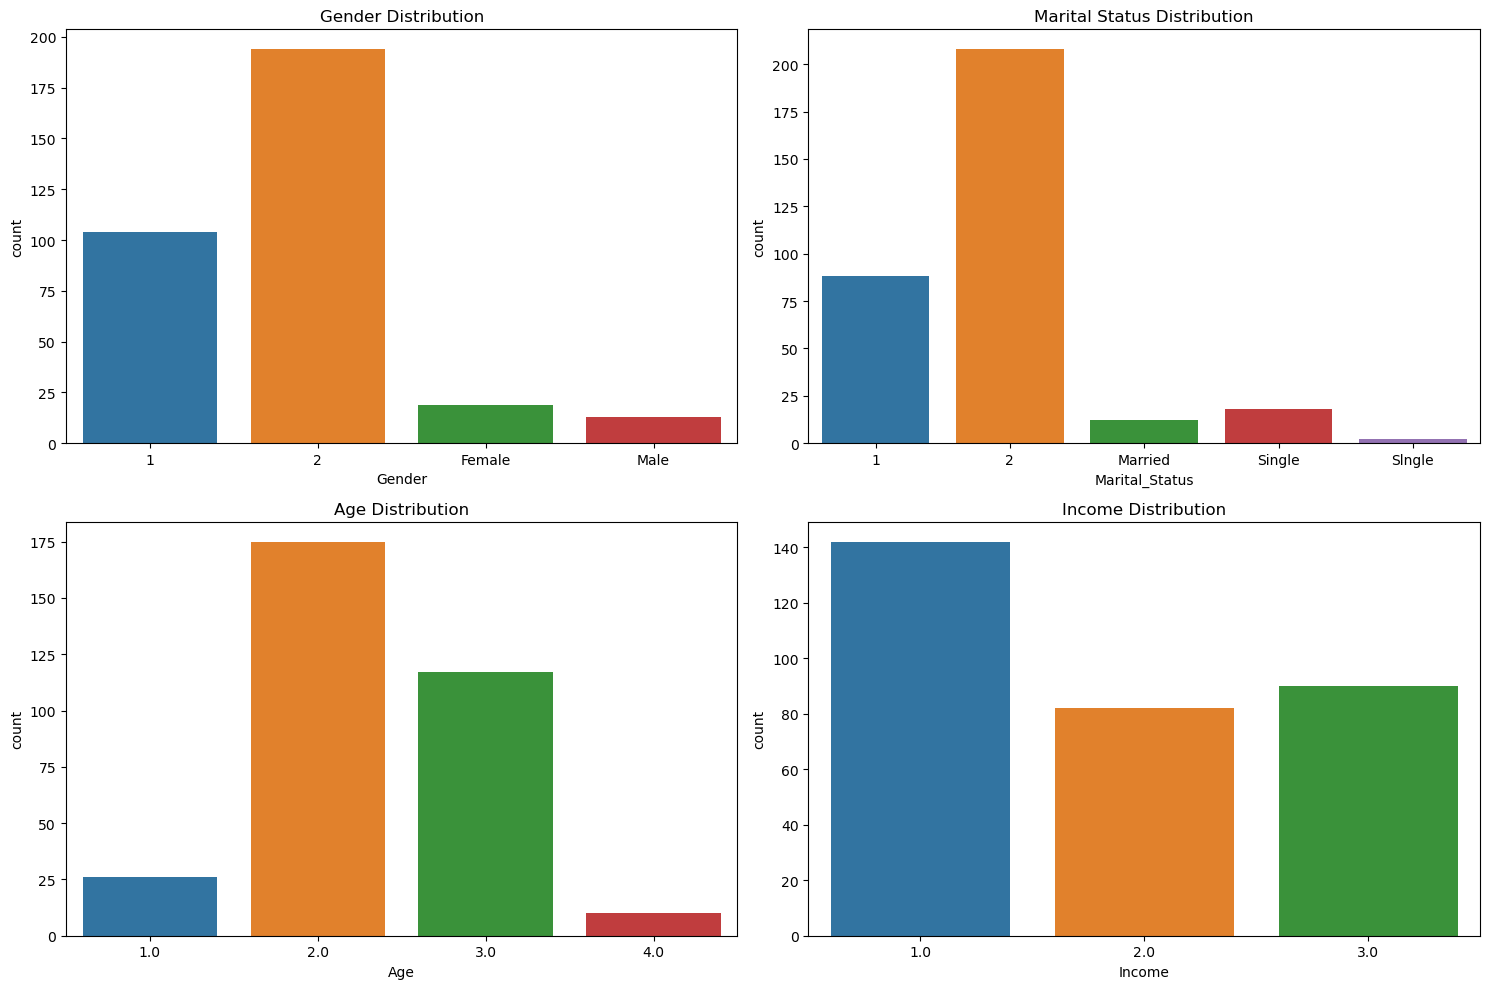

In [161]:
# Visualize the demographic profile
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data=df, x='Gender', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

sns.countplot(data=df, x='Marital_Status', ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution')

sns.countplot(data=df, x='Age', ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution')

sns.countplot(data=df, x='Income', ax=axes[1, 1])
axes[1, 1].set_title('Income Distribution')

plt.tight_layout()
plt.show()




C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


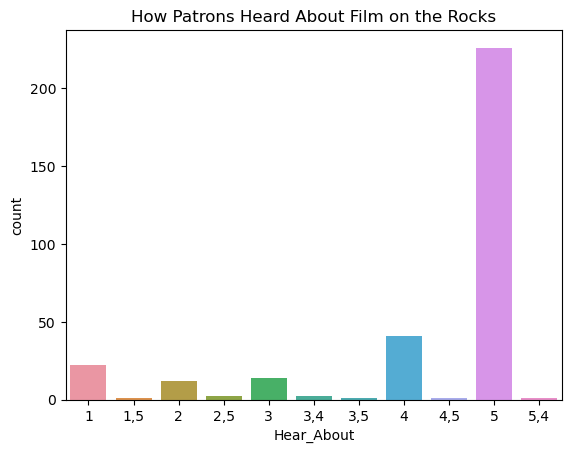

In [162]:
# Visualize how patrons heard about the film series
sns.countplot(data=df, x='Hear_About')
plt.title('How Patrons Heard About Film on the Rocks')
plt.show()

In [163]:
# Inspect the data types
# print(df.dtypes)

# If any numeric columns are read as strings, convert them
for col in ['Gender', 'Marital_Status', 'Age', 'Income', 'Sinage', 'Parking', 'Clean', 'Overall']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for any remaining non-numeric columns
print(df.dtypes)

_rowstate_               int64
Movie                   object
Gender                 float64
Marital_Status         float64
Sinage                 float64
Parking                float64
Clean                  float64
Overall                float64
Age                    float64
Income                 float64
Hear_About            category
Total_Satisfaction     float64
dtype: object


C:\Users\ashut\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


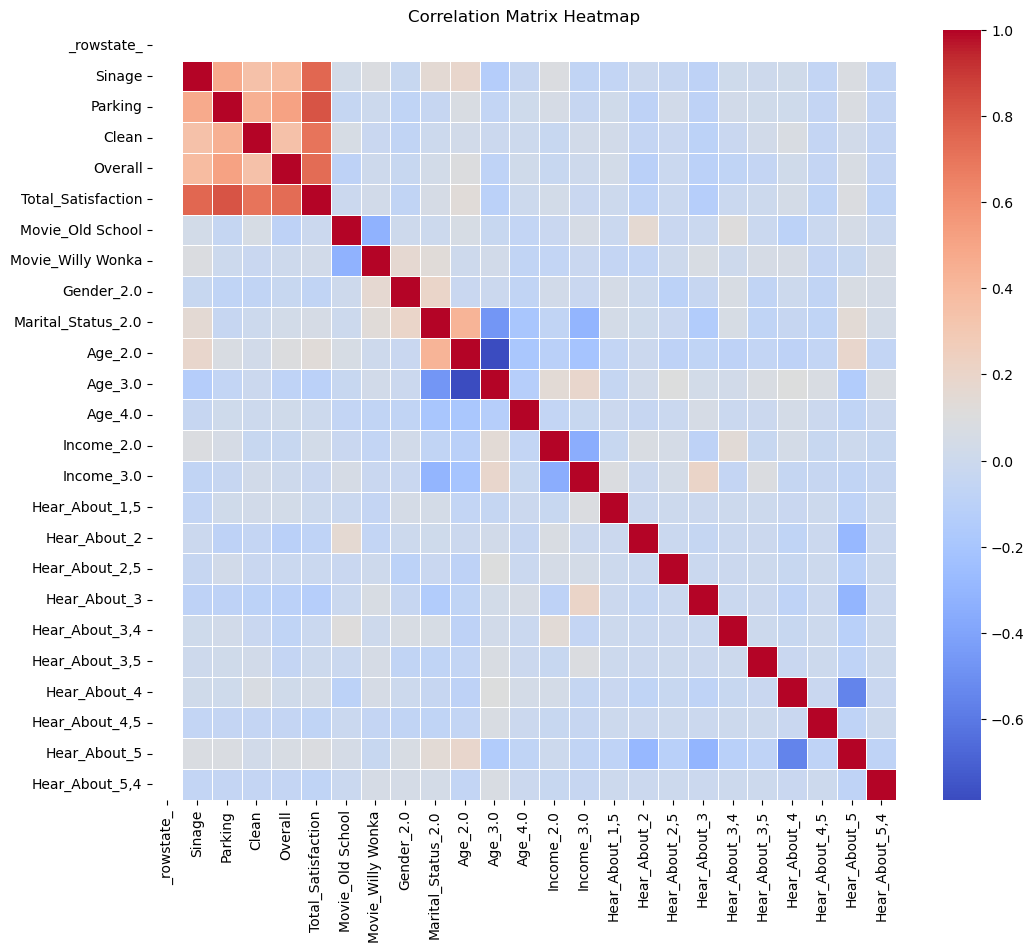

In [164]:
# Encode categorical variables for correlation matrix
df_encoded = pd.get_dummies(df, columns=['Movie','Gender', 'Marital_Status', 'Age', 'Income', 'Hear_About'], drop_first=True)

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Title for the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


H0 - There is a significant association ,significance level 0f 90%,  alpha =  0.1

In [166]:
# Define a function to perform chi-square tests and display results
def chi_square_test(variable):
    contingency_table = pd.crosstab(df[variable], df['Overall'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi-Square Test between {variable} and Overall Satisfaction:')
    print('Chi2:', chi2)
    print('p-value:', p)
    if p < 0.10:
        print('Conclusion: There is a significant association.\n')
    else:
        print('Conclusion: There is no significant association.\n')

# Perform chi-square tests for each categorical variable
categorical_vars = ['Gender', 'Marital_Status', 'Age', 'Income', 'Hear_About']

for var in categorical_vars:
    chi_square_test(var)


Chi-Square Test between Gender and Overall Satisfaction:
Chi2: 2.4904259806187263
p-value: 0.6463509862183129
Conclusion: There is no significant association.

Chi-Square Test between Marital_Status and Overall Satisfaction:
Chi2: 4.489570366331987
p-value: 0.343785956572412
Conclusion: There is no significant association.

Chi-Square Test between Age and Overall Satisfaction:
Chi2: 10.578834827658923
p-value: 0.565314833241553
Conclusion: There is no significant association.

Chi-Square Test between Income and Overall Satisfaction:
Chi2: 5.689397280419405
p-value: 0.6819780790955854
Conclusion: There is no significant association.

Chi-Square Test between Hear_About and Overall Satisfaction:
Chi2: 23.17484918770403
p-value: 0.9846161677718452
Conclusion: There is no significant association.



In [167]:
# Business significance conclusions
print("Business Significance Conclusions:")

# Visualize overall satisfaction
overall_satisfaction = df['Overall'].value_counts().sort_index()
print("Overall customer satisfaction distribution:")
print(overall_satisfaction)

Business Significance Conclusions:
Overall customer satisfaction distribution:
Overall
1.0    151
2.0    160
3.0     12
4.0      1
5.0      4
Name: count, dtype: int64


In [168]:
if overall_satisfaction[1] > 0.5 * len(df):
    print("Conclusion: Majority of customers are very satisfied.")
else:
    print("Conclusion: Majority of customers are not very satisfied.")

Conclusion: Majority of customers are not very satisfied.


In [169]:
# Analyze effective media outlets
media_outlets = df['Hear_About'].value_counts()
print("\nEffective media outlets:")
print(media_outlets)


Effective media outlets:
Hear_About
5      226
4       41
1       22
3       14
2       12
2,5      2
3,4      2
1,5      1
3,5      1
4,5      1
5,4      1
Name: count, dtype: int64


In [170]:
most_effective_outlet = media_outlets.idxmax()
print(f"Most effective media outlet: {most_effective_outlet}")

Most effective media outlet: 5


In [171]:
# Provide recommendations based on findings
print("\nRecommendations:")
print("1. Focus advertising efforts on the most effective media outlet identified.")
print("2. Address any issues related to parking and cleanliness as these are critical to overall satisfaction.")
print("3. Enhance the experience further by possibly adding more signage to help patrons navigate the venue better.")


Recommendations:
1. Focus advertising efforts on the most effective media outlet identified.
2. Address any issues related to parking and cleanliness as these are critical to overall satisfaction.
3. Enhance the experience further by possibly adding more signage to help patrons navigate the venue better.


In [172]:
# Generate and display contingency tables for all variables
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Overall'])
    print(f'\nContingency Table for {var} and Overall Satisfaction:')
    print(contingency_table)


Contingency Table for Gender and Overall Satisfaction:
Overall  1.0  2.0  3.0  4.0  5.0
Gender                          
1.0       46   50    6    0    1
2.0       90   95    5    1    2

Contingency Table for Marital_Status and Overall Satisfaction:
Overall         1.0  2.0  3.0  4.0  5.0
Marital_Status                         
1.0              42   42    2    1    0
2.0              93  102    9    0    3

Contingency Table for Age and Overall Satisfaction:
Overall  1.0  2.0  3.0  4.0  5.0
Age                             
1.0       16    8    1    0    1
2.0       74   87    8    1    3
3.0       56   58    3    0    0
4.0        3    7    0    0    0

Contingency Table for Income and Overall Satisfaction:
Overall  1.0  2.0  3.0  4.0  5.0
Income                          
1.0       65   67    7    1    1
2.0       41   36    4    0    1
3.0       38   50    1    0    1

Contingency Table for Hear_About and Overall Satisfaction:
Overall     1.0  2.0  3.0  4.0  5.0
Hear_About          